In [9]:
%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 4)

from util import util
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data_folder = os.path.join('../..', 'data')
file_name = "DataForModel"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
data = util.load_data(data_folder, file_name)
data = data[data['Div'] == 'E3']
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,Season,ELO diff,Home_prob_ELO,Draw_prob_ELO,...,Diff_shots_on_target_attempted,Diff_shots_on_target_allowed,Diff_shots_attempted,Diff_shots_allowed,Diff_corners_awarded,Diff_corners_conceded,Diff_fouls_commited,Diff_fouls_suffered,Diff_yellow_cards,Diff_red_cards
1312,E3,2005-08-29,Darlington,Rochdale,2.0,1.0,0506,-10.211153,0.439822,0.234380,...,-1,-17,-15,-28,-7,8,3,18,-3,-2
1313,E3,2005-08-29,Leyton Orient,Shrewsbury,0.0,1.0,0506,61.460214,0.563882,0.182473,...,3,-15,1,-19,13,-6,11,-5,4,1
1314,E3,2005-08-29,Lincoln,Carlisle,0.0,0.0,0506,9.929022,0.475719,0.219360,...,-1,7,-17,-4,0,1,30,6,3,2
1315,E3,2005-08-29,Mansfield,Notts County,2.0,3.0,0506,-56.493335,0.360856,0.259601,...,1,-5,5,-10,13,5,-11,26,-4,0
1316,E3,2005-08-29,Northampton,Boston,3.0,2.0,0506,35.919886,0.520976,0.200425,...,-2,7,6,9,-14,-10,-29,12,-7,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33998,E3,2024-04-27,Gillingham,Doncaster,2.0,2.0,2324,-111.203962,0.303611,0.218419,...,-16,12,-18,28,1,6,6,-19,-4,0
33999,E3,2024-04-27,Milton Keynes Dons,Sutton,4.0,4.0,2324,147.385429,0.692702,0.128574,...,2,-9,13,-23,-1,5,-29,10,-6,0
34000,E3,2024-04-27,Salford,Harrogate,2.0,2.0,2324,-47.482218,0.372310,0.262627,...,-7,-7,7,-18,-8,-4,17,6,9,2
34001,E3,2024-04-27,Swindon,Morecambe,3.0,3.0,2324,-33.608246,0.397536,0.252073,...,12,9,13,17,-13,-8,7,6,-5,1


In [25]:
data.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'Season',
       'ELO diff', 'Home_prob_ELO', 'Draw_prob_ELO', 'Away_prob_ELO',
       'Diff_goals_scored', 'Diff_goals_conceded', 'Matchrating',
       'Diff_points', 'Diff_change_in_ELO', 'Diff_opposition_mean_ELO',
       'Diff_shots_on_target_attempted', 'Diff_shots_on_target_allowed',
       'Diff_shots_attempted', 'Diff_shots_allowed', 'Diff_corners_awarded',
       'Diff_corners_conceded', 'Diff_fouls_commited', 'Diff_fouls_suffered',
       'Diff_yellow_cards', 'Diff_red_cards'],
      dtype='object')

In [26]:
x = data[['ELO diff', 'Home_prob_ELO', 'Draw_prob_ELO', 'Away_prob_ELO',
       'Diff_goals_scored', 'Diff_goals_conceded', 'Matchrating',
       'Diff_points', 'Diff_change_in_ELO', 'Diff_opposition_mean_ELO',
       'Diff_shots_on_target_attempted', 'Diff_shots_on_target_allowed',
       'Diff_shots_attempted', 'Diff_shots_allowed', 'Diff_corners_awarded',
       'Diff_corners_conceded', 'Diff_fouls_commited', 'Diff_fouls_suffered',
       'Diff_yellow_cards', 'Diff_red_cards']]
y = data['FTHG'] - data['FTAG']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [28]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 2.71


In [30]:
results = pd.DataFrame({
    'Actual Goal Difference': y_test,
    'Predicted Goal Difference': y_pred
})

# Count the number of rows where both actual and predicted are positive or negative
same_sign = ((results['Actual Goal Difference'] > 0) & (results['Predicted Goal Difference'] > 0)) | \
            ((results['Actual Goal Difference'] < 0) & (results['Predicted Goal Difference'] < 0))
num_same_sign = same_sign.sum()

# Count the number of rows where actual and predicted differ in sign
diff_sign = ~same_sign
num_diff_sign = diff_sign.sum()

print(f"Number of rows where actual and predicted have the same sign: {num_same_sign}")
print(f"Number of rows where actual and predicted differ in sign: {num_diff_sign}")
print(f"Percentage: {num_same_sign/len(results)}%")
results

Number of rows where actual and predicted have the same sign: 835
Number of rows where actual and predicted differ in sign: 1010
Percentage: 0.45257452574525747%


,Actual Goal Difference,Predicted Goal Difference
5116,1.0,0.241351
4971,-2.0,0.208696
33992,4.0,-0.076518
3533,-2.0,0.662340
31954,0.0,0.052492
...,...,...
28254,2.0,0.153404
6774,-1.0,0.435265
23015,1.0,1.200111
28129,0.0,0.397708


In [24]:
index = np.arange(-5.0, 5.1, 0.25)
index = np.round(index, 2)  # Ensure we have exactly one decimal place

# Round predictions to nearest 0.1
rounded_predictions = np.round(y_pred * 4) / 4

# Create DataFrame with predictions and actual values
analysis_df = pd.DataFrame({
    'rounded_pred': rounded_predictions,
    'actual': y_test
})

# Function to calculate shares for each bucket
def calculate_shares(group):
    total = len(group)
    return pd.Series({
        'Count': total,
        'Share Home Win': (group['actual'] > 0).sum() / total if total > 0 else 0,
        'Share Draw': (group['actual'] == 0).sum() / total if total > 0 else 0,
        'Share Away Win': (group['actual'] < 0).sum() / total if total > 0 else 0
    })

# Group by rounded predictions and calculate shares
bucket_df = analysis_df.groupby('rounded_pred').apply(calculate_shares).reset_index()

# Create complete DataFrame with all possible values
full_bucket_df = pd.DataFrame(index=index)
full_bucket_df = full_bucket_df.join(bucket_df.set_index('rounded_pred'))

# Fill NaN with 0
full_bucket_df = full_bucket_df.fillna(0)

# Convert Count to integer and shares to percentages
full_bucket_df['Count'] = full_bucket_df['Count'].astype(int)
full_bucket_df['Share Home Win'] = (full_bucket_df['Share Home Win']).round(3)
full_bucket_df['Share Draw'] = (full_bucket_df['Share Draw']).round(3)
full_bucket_df['Share Away Win'] = (full_bucket_df['Share Away Win']).round(3)

# Sort index
full_bucket_df = full_bucket_df.sort_index()

full_bucket_df[full_bucket_df['Count'] > 0]

/var/folders/1k/pyn04stx4cv8pm3wp53v74r80000gn/T/ipykernel_36156/3984586576.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bucket_df = analysis_df.groupby('rounded_pred').apply(calculate_shares).reset_index()


,Count,Share Home Win,Share Draw,Share Away Win
-2.25,1,0.000,0.000,1.000
-2.00,3,0.000,0.333,0.667
-1.75,9,0.111,0.222,0.667
-1.50,17,0.059,0.118,0.824
-1.25,40,0.125,0.075,0.800
-1.00,63,0.159,0.238,0.603
-0.75,162,0.228,0.284,0.488
-0.50,345,0.241,0.267,0.493
-0.25,753,0.313,0.307,0.380
0.00,1131,0.356,0.286,0.357


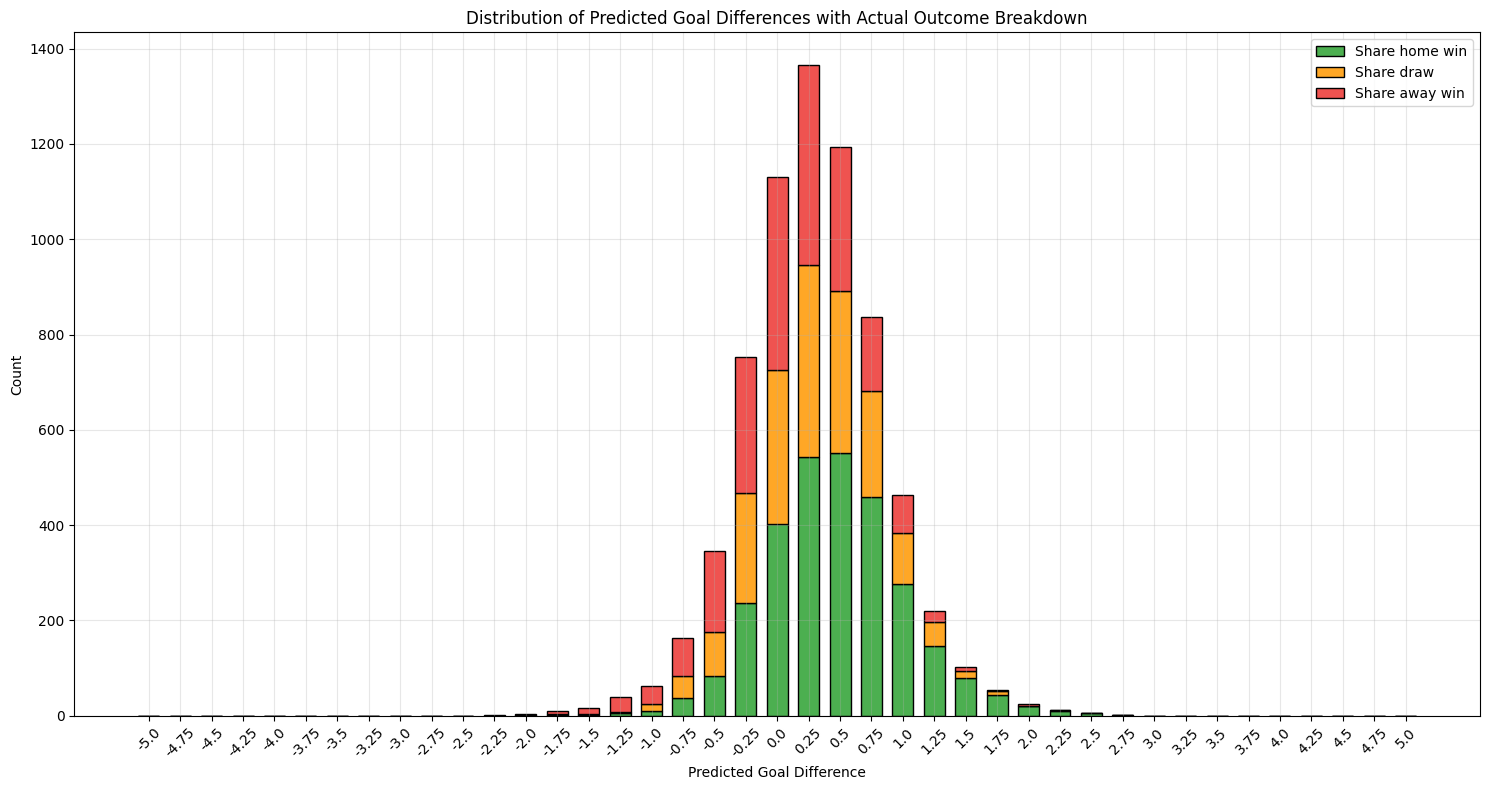

In [25]:
plt.figure(figsize=(15, 8))

# Get positions for bars - multiply by 1.2 to create space between bars
bar_positions = np.arange(len(full_bucket_df.index)) * 1.2

# Calculate the absolute values for each category
home_wins = full_bucket_df['Count'] * full_bucket_df['Share Home Win']
draws = full_bucket_df['Count'] * full_bucket_df['Share Draw']
away_wins = full_bucket_df['Count'] * full_bucket_df['Share Away Win']

# Create the stacked bar chart with edgecolor for borders
bar_width = 0.8  # Width less than 1 creates space between bars
plt.bar(bar_positions, home_wins, width=bar_width, 
        label='Share home win', color='#4CAF50', 
        edgecolor='black', linewidth=1)
plt.bar(bar_positions, draws, width=bar_width,
        bottom=home_wins, label='Share draw', 
        color='#FFA726', edgecolor='black', linewidth=1)
plt.bar(bar_positions, away_wins, width=bar_width,
        bottom=home_wins+draws, label='Share away win', 
        color='#EF5350', edgecolor='black', linewidth=1)

# Customize the plot
plt.xlabel('Predicted Goal Difference')
plt.ylabel('Count')
plt.title('Distribution of Predicted Goal Differences with Actual Outcome Breakdown')
plt.legend()
plt.grid(True, alpha=0.3)

# Set x-ticks to show actual goal difference values
plt.xticks(bar_positions, full_bucket_df.index, rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()